In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Loading & Filtering

    -data is loaded from the csv file

In [41]:
file ="data.csv"

data = pd.read_csv(file, delimiter=',')

print(data.columns)

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')


    -removed unnecessary columns & renamed them in english

In [42]:
data = data[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]

data.columns = ['Category', 'Type', 'Year', 'Month', 'Value']
print(data.head(4))

         Category       Type  Year   Month  Value
0  Alkoholunfälle  insgesamt  2024  202401    NaN
1  Alkoholunfälle  insgesamt  2024  202402    NaN
2  Alkoholunfälle  insgesamt  2024  202403    NaN
3  Alkoholunfälle  insgesamt  2024  202404    NaN


    -removed all entries with year > 2020 & formatted the month column

In [43]:
data = data[(data['Year'] <= 2020) & (data['Month'] != "Summe") & (data['Type'] == "insgesamt")]
print(data.head(4))

          Category       Type  Year   Month  Value
51  Alkoholunfälle  insgesamt  2020  202001   28.0
52  Alkoholunfälle  insgesamt  2020  202002   40.0
53  Alkoholunfälle  insgesamt  2020  202003   27.0
54  Alkoholunfälle  insgesamt  2020  202004   26.0


In [44]:
data['Month'] = data['Month'].str[4:]
print(data.head(4))

          Category       Type  Year Month  Value
51  Alkoholunfälle  insgesamt  2020    01   28.0
52  Alkoholunfälle  insgesamt  2020    02   40.0
53  Alkoholunfälle  insgesamt  2020    03   27.0
54  Alkoholunfälle  insgesamt  2020    04   26.0


In [45]:
print(data['Category'].unique())

['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']


In [46]:
data = data[data['Category'] == "Alkoholunfälle"]

Data Visualization

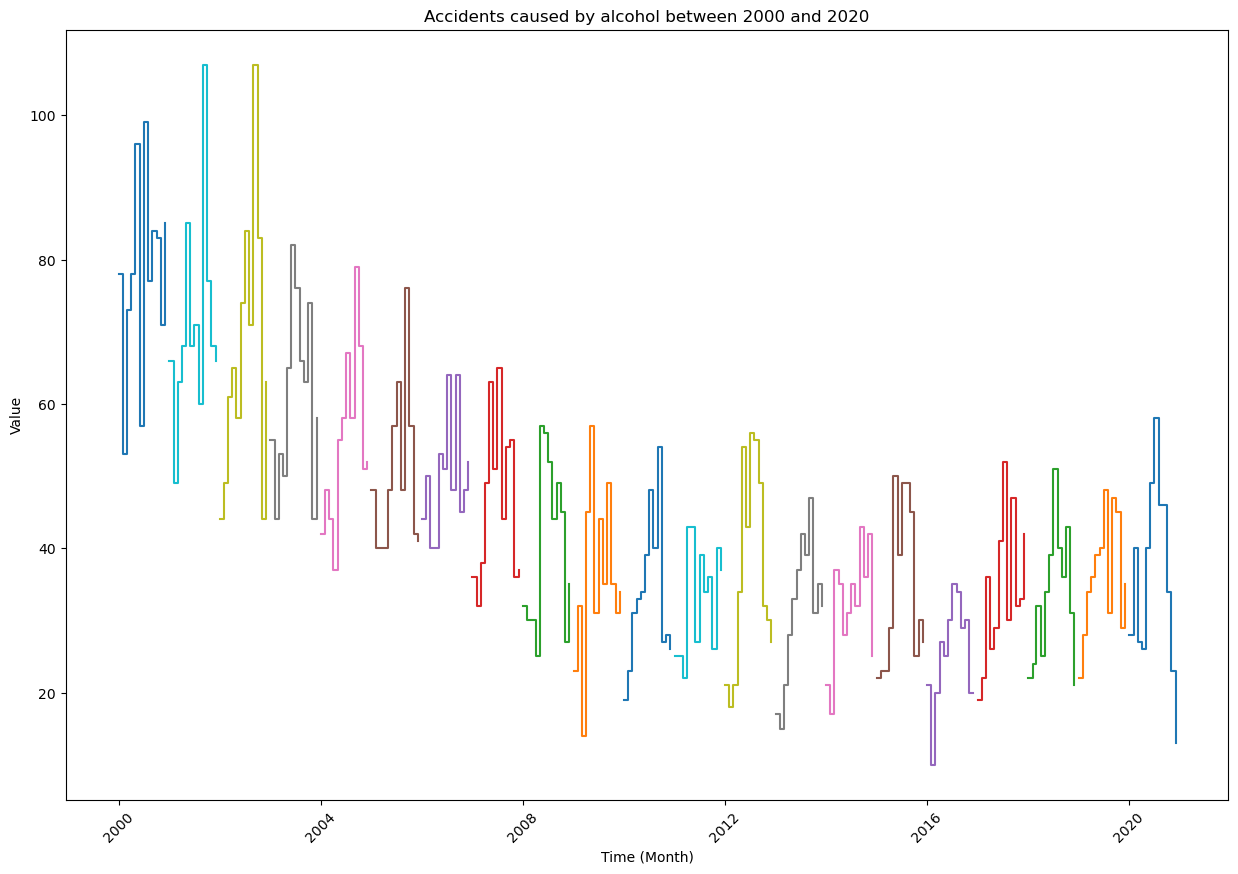

In [47]:
plt.figure(figsize=(15, 10))
for year in data['Year'].unique():
    year_data = data[data['Year'] == year].sort_values('Month')
    plt.step(
        pd.to_datetime(year_data['Year'].astype(str) + '-' + year_data['Month'].astype(str),
        format='%Y-%m'), 
        year_data['Value'],
        label=str(year),
        where='post'
    )
plt.xticks(rotation=45)
plt.title('Accidents caused by alcohol between 2000 and 2020')
plt.xlabel('Time (Month)')
plt.ylabel('Value')
plt.show()